In [1]:
import pickle 

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

%matplotlib inline

In [32]:
with open("trajectory.pkl","rb") as handle:
    trajectory = pickle.load(handle)

n_points = trajectory["r"][0].shape[0]
half_n_points = int(n_points/2)

L = trajectory["L"]

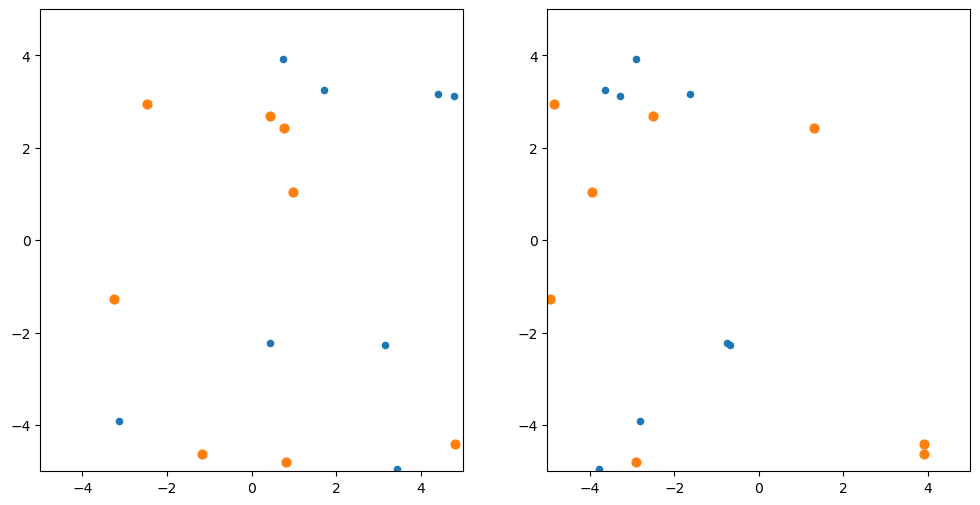

In [33]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

scats = []

R = trajectory['r'][0]

scats.append( ax[0].scatter(R[:half_n_points, 0], R[:half_n_points, 1], s = 20) )
scats.append( ax[1].scatter(R[:half_n_points, 2], R[:half_n_points, 1], s = 20) )

scats.append( ax[0].scatter(R[half_n_points:, 0], R[half_n_points:, 1], s = 40) )
scats.append( ax[1].scatter(R[half_n_points:, 2], R[half_n_points:, 1], s = 40) )

ax[0].set_xlim(-L/2,L/2)
ax[0].set_ylim(-L/2,L/2)
ax[1].set_xlim(-L/2,L/2)
ax[1].set_ylim(-L/2,L/2)

def animate(i):
    R = trajectory['r'][i]

    scats[0].set_offsets(
        np.vstack([R[:half_n_points, 0], R[:half_n_points, 1]]).T
    )
    scats[1].set_offsets(
        np.vstack([R[:half_n_points, 2], R[:half_n_points, 1]]).T
    )

    scats[2].set_offsets(
        np.vstack([R[half_n_points:, 0], R[half_n_points:, 1]]).T
    )
    scats[3].set_offsets(
        np.vstack([R[half_n_points:, 2], R[half_n_points:, 1]]).T
    )
    
ani = animation.FuncAnimation(fig, func=animate, frames= len(trajectory["steps"]))

ani.save('trajectory.html', writer=animation.HTMLWriter(fps= 1))

ani.save(filename="trajectory.gif", writer="pillow")

In [ ]:
df

In [ ]:
data=df[df['time']==2]
data

In [ ]:
list(np.real(trajectory[1][0]))